<a href="https://colab.research.google.com/github/SKitavi/Smarthive-ai/blob/main/SmartHive_Phase1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# SmartHive AI Checkpoints

**Objectives:**

*  Build a data-driven model to segment customers based on their purchasing behaviour, demographics, preferences, and engagement patterns..

*  Measure and Evaluate the Impact of Segmentation Strategies


*   Deploy these capabilities through an interactive dashboard,or web application enabling marketing teams to visualise segments, execute targeted campaigns, and monitor their performance in real-time.





**Data Collection and Preparation**

For this project, we will mainly be using the Customer Data.csv dataset.

The dataset contains 8951 entries/rows and 18 columns. It comprises of attributes related to customers and their purchasing behaviour.

Key Attributes:

***Customer Information***

**1. CUST_ID**: A unique identifier assigned to each customer.

**2. CREDIT_LIMIT**: The maximum amount of credit a customer is allowed to use.

**3. TENURE**: The length of time the customer has been with the company or has had the credit account.


***Purchase and Spending Behavior***  

**4. BALANCE:** The current outstanding balance on the customer's account.

**5. BALANCE_FREQUENCY**: The frequency with which the customer pays off their balance. (e.g., monthly, quarterly)

**6. PURCHASES**: The total amount of purchases made by the customer.

**7. ONEOFF_PURCHASES**: The total amount of one-time purchases made by the customer.

**8. INSTALLMENTS_PURCHASES**: The total amount of purchases made on installments by the customer.

**9. CASH_ADVANCE**: The total amount of cash withdrawn from the credit account.

**10. PURCHASES_FREQUENCY**: The frequency with which the customer makes purchases.

**11. ONEOFF_PURCHASES_FREQUENCY**: The frequency with which the customer makes one-time purchases.

**12. PURCHASES_INSTALLMENTS_FREQUENCY**: The frequency with which the customer makes purchases on installments.

**13. CASH_ADVANCE_FREQUENCY**: The frequency with which the customer withdraws cash from the credit account.

**14. PURCHASES_TRX**: The number of purchase transactions made by the customer.

**15. CASH_ADVANCE_TRX**: The number of cash advance transactions made by the customer.


***Payment Information***

**16. PAYMENTS**: The total amount of payments made by the customer.

**17. MINIMUM_PAYMENTS**: The minimum payment amount required from the customer.

**18. PRC_FULL_PAYMENT**: The percentage of times the customer has paid their balance in full.



## **1. Importing Necessary Libraries**

> Add blockquote



In [10]:
!pip install pandas numpy

In [17]:
#importing libraries
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
import matplotlib.pyplot as plt

## **2. Loading the CSV file**

In [12]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [13]:
#Loading the csv
df = pd.read_csv('/content/drive/MyDrive/Copy of Customer Data.csv')


#**Basic Previews of the Dataset**

In [8]:
#shape of dataset
df.shape

(8950, 18)

There are 8950 rows and 18 columns after cleaning.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

In [ ]:
#preview of the entries
df.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


To view the data types and characteristics of the data we have.


In [ ]:
#for the numeric description of our attribute values
df.describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8949.000000,8950.000000,8637.000000,8950.000000,8950.000000
mean,1564.474828,0.877271,1003.204834,592.437371,411.067645,978.871112,0.490351,0.202458,0.364437,0.135144,3.248827,14.709832,4494.449450,1733.143852,864.206542,0.153715,11.517318
std,2081.531879,0.236904,2136.634782,1659.887917,904.338115,2097.163877,0.401371,0.298336,0.397448,0.200121,6.824647,24.857649,3638.815725,2895.063757,2372.446607,0.292499,1.338331
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.019163,0.000000,6.000000
25%,128.281915,0.888889,39.635000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1600.000000,383.276166,169.123707,0.000000,12.000000
50%,873.385231,1.000000,361.280000,38.000000,89.000000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,856.901546,312.343947,0.000000,12.000000
75%,2054.140036,1.000000,1110.130000,577.405000,468.637500,1113.821139,0.916667,0.300000,0.750000,0.222222,4.000000,17.000000,6500.000000,1901.134317,825.485459,0.142857,12.000000
max,19043.138560,1.000000,49039.570000,40761.250000,22500.000000,47137.211760,1.000000,1.000000,1.000000,1.500000,123.000000,358.000000,30000.000000,50721.483360,76406.207520,1.000000,12.000000


# **3. Handle Missing Values:**

In [ ]:
#identifying the number of missing values
missing_values = df.isnull().sum()
print(missing_values)

CUST_ID                               0
BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64


**Observations**

It seems there are columns with null values in the CSV that could skew our analysis.

*   CREDIT_LIMIT contains 1 missing value. This can be handled by strategically imputing according to the TENURE of the customer and PURCHASES_TRX which is the number of purchase transactions made with have
a direct impact on the credit limit.
*   MINIMUM_PAYMENTS contains the highest number of missing values and this could either be due to error or many products not having a minimum payment amount. Seeing as the minimum payment amount is not a key factor in customer segmentation, and the column has no predictive value, the column can be eliminated.





In [ ]:
# Identify the row with the missing value
missing_credit_limit_index = df[df['CREDIT_LIMIT'].isnull()].index[0]

print("The row with the missing value in CREDIT_LIMIT is:", missing_credit_limit_index)

#Output the row
df.loc[missing_credit_limit_index]

The row with the missing value in CREDIT_LIMIT is: 5203


,5203
CUST_ID,C15349
BALANCE,18.400472
BALANCE_FREQUENCY,0.166667
PURCHASES,0.0
ONEOFF_PURCHASES,0.0
INSTALLMENTS_PURCHASES,0.0
CASH_ADVANCE,186.853063
PURCHASES_FREQUENCY,0.0
ONEOFF_PURCHASES_FREQUENCY,0.0
PURCHASES_INSTALLMENTS_FREQUENCY,0.0


In [ ]:
# Check if the condition is met for the specific row
if (df.loc[5203, 'PURCHASES_TRX'] < 3) and (df.loc[5203, 'TENURE'] < 7) and pd.isnull(df.loc[5203, 'CREDIT_LIMIT']):
    df.loc[5203, 'CREDIT_LIMIT'] = 500

#Output row after imputation
df.loc[5203]

,5203
CUST_ID,C15349
BALANCE,18.400472
BALANCE_FREQUENCY,0.166667
PURCHASES,0.0
ONEOFF_PURCHASES,0.0
INSTALLMENTS_PURCHASES,0.0
CASH_ADVANCE,186.853063
PURCHASES_FREQUENCY,0.0
ONEOFF_PURCHASES_FREQUENCY,0.0
PURCHASES_INSTALLMENTS_FREQUENCY,0.0


In [ ]:
#dropping the MINIMUM_PAYMENTS column
df.drop(columns=['MINIMUM_PAYMENTS'], inplace=True)


In [ ]:
#Output columns after dropping MINIMUM_PAYMENTS
df.columns

Index(['CUST_ID', 'BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES',
       'ONEOFF_PURCHASES', 'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE',
       'PURCHASES_FREQUENCY', 'ONEOFF_PURCHASES_FREQUENCY',
       'PURCHASES_INSTALLMENTS_FREQUENCY', 'CASH_ADVANCE_FREQUENCY',
       'CASH_ADVANCE_TRX', 'PURCHASES_TRX', 'CREDIT_LIMIT', 'PAYMENTS',
       'PRC_FULL_PAYMENT', 'TENURE'],
      dtype='object')

# **4. Removing Duplicates**

> Add blockquote




In [ ]:
#Check if dataset has duplicates
df.duplicated().sum()

0

Our data has no duplicates and therefore we can now do EDA.

# **5. Exploratory Data Analysis (EDA)**

> Add blockquote


Graphical EDA is done to analyse and visualise data in our dataset to uncover patterns, trends and identify outliers or anomalies.

**(a) Univariate Analysis**

Analyzing individual attributes to understand their distributions, summary statistics, and outliers.

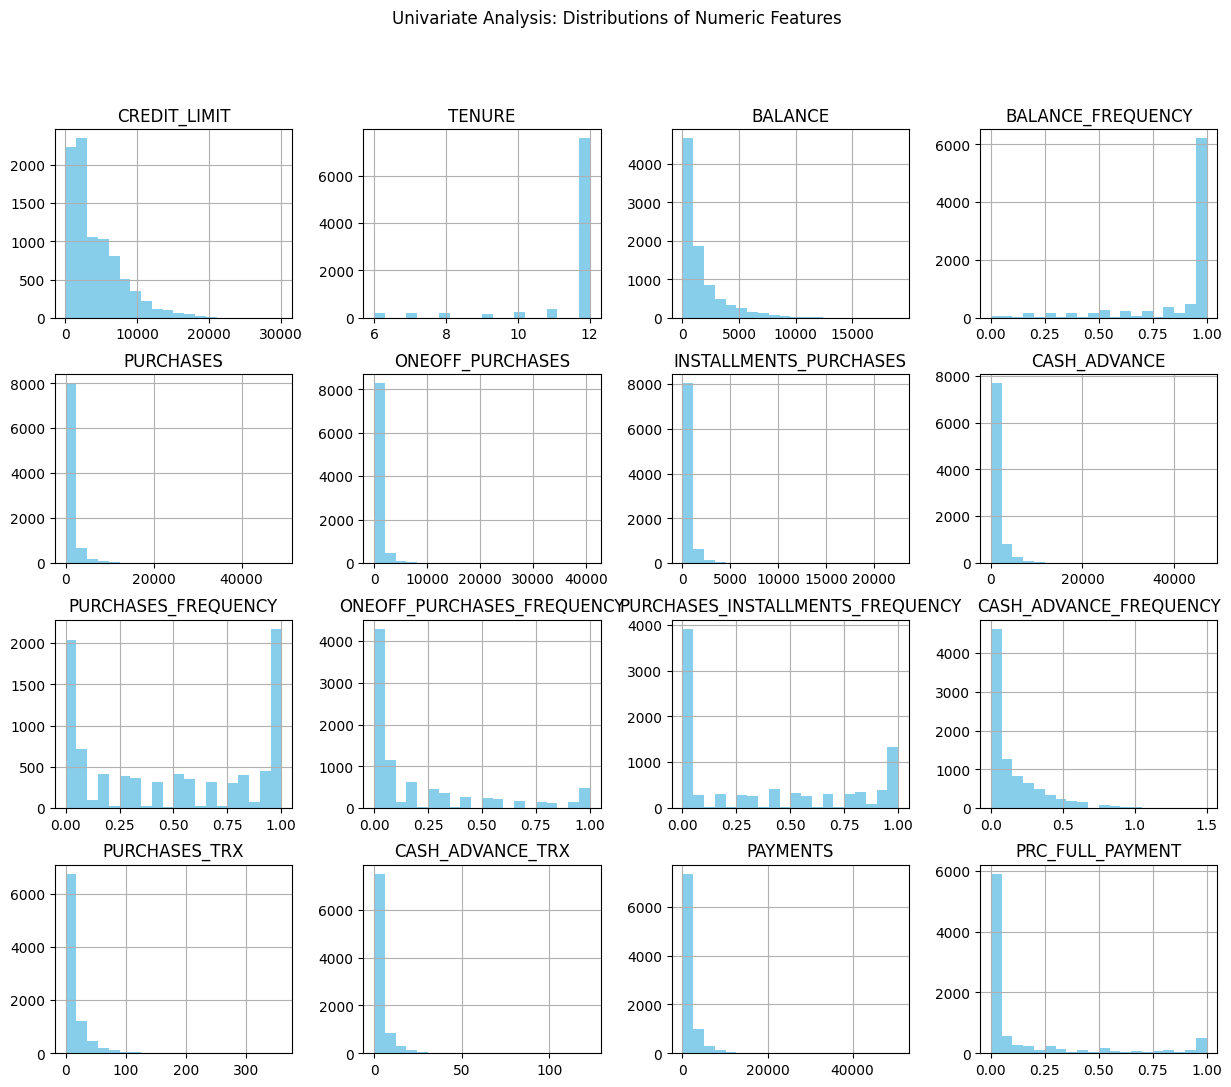

In [18]:
# Plot histograms for numerical variables
numeric_columns = ['CREDIT_LIMIT', 'TENURE', 'BALANCE', 'BALANCE_FREQUENCY',
                   'PURCHASES', 'ONEOFF_PURCHASES', 'INSTALLMENTS_PURCHASES',
                   'CASH_ADVANCE', 'PURCHASES_FREQUENCY', 'ONEOFF_PURCHASES_FREQUENCY',
                   'PURCHASES_INSTALLMENTS_FREQUENCY', 'CASH_ADVANCE_FREQUENCY',
                   'PURCHASES_TRX', 'CASH_ADVANCE_TRX', 'PAYMENTS', 'PRC_FULL_PAYMENT']

# Histograms
df[numeric_columns].hist(figsize=(15, 12), bins=20, color='skyblue')
plt.suptitle('Univariate Analysis: Distributions of Numeric Features')
plt.show()

# Key Observations:

1. The distribution of the **CREDIT_LIMIT** is right-skewed, with the majority of customers having lower credit limits. There are a few customers with very high credit limits, which creates a long right tail.


2. The **TENURE** distribution is bimodal. Many customers seem to have tenures of 12 years, indicating either a cap or a large cohort of long-term customers, with another peak at lower tenure values.


3. **BALANCE** also shows a right-skewed distribution, where most customers have low balances, but some customers have significantly higher balances, leading to a long tail.


4. The **BALANCE_FREQUENCY** shows that most customers have a high frequency (close to 1), suggesting that most customers check or pay off their balances frequently.


5. The distribution for **PURCHASES** is heavily right-skewed, with most customers having low total purchase amounts. A small number of customers, however, have very large purchase values, contributing to the long tail on the right.


6. Both **ONEOFF_PURCHASES** and **INSTALLMENTS_PURCHASES** are right-skewed. Most customers make low or no one-off purchases or installment purchases, while a few have large amounts.


7. The **CASH_ADVANCE** distribution is also right-skewed. The majority of customers either do not use or have low cash advances, but a small number of customers withdraw significant amounts.
Purchases Frequency:

8. **PURCHASES_FREQUENCY** has a left-skewed distribution, with many customers making purchases frequently (values close to 1). This suggests that a significant portion of customers make regular purchases.


9. The distribution of **ONEOFF_PURCHASES_FREQUENCY** is right-skewed, with most customers having low frequencies for one-off purchases.
Purchases Installments Frequency:

10. **PURCHASES_INSTALLMENTS_FREQUENCY** is left-skewed, indicating that most customers frequently make purchases via installments.


11. The **CASH_ADVANCE_FREQUENCY** distribution shows that most customers have a very low frequency of cash advances, with some customers having occasional cash advances.


12. The distribution of **PURCHASES_TRX **is right-skewed, showing that most customers make a small number of transactions, while a few customers have many transactions.


13. The **PAYMENTS** distribution is right-skewed, with most customers making low total payments, but a few make significantly higher payments.
Percent Full Payment (PRC_FULL_PAYMENT):

14. The **PRC_FULL_PAYMENT** distribution is skewed towards higher values, with a large proportion of customers often paying off their balances in full.

In [19]:
#Summary Statistics for Categorical and Numerical Features

print("\nSummary Statistics:")
print(df.describe())


Summary Statistics:
            BALANCE  BALANCE_FREQUENCY     PURCHASES  ONEOFF_PURCHASES  \
count   8950.000000        8950.000000   8950.000000       8950.000000   
mean    1564.474828           0.877271   1003.204834        592.437371   
std     2081.531879           0.236904   2136.634782       1659.887917   
min        0.000000           0.000000      0.000000          0.000000   
25%      128.281915           0.888889     39.635000          0.000000   
50%      873.385231           1.000000    361.280000         38.000000   
75%     2054.140036           1.000000   1110.130000        577.405000   
max    19043.138560           1.000000  49039.570000      40761.250000   

       INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
count             8950.000000   8950.000000          8950.000000   
mean               411.067645    978.871112             0.490351   
std                904.338115   2097.163877             0.401371   
min                  0.000000      0.000

**(b) Bivariate Analysis**

Analyzing relationships between two variables, looking for correlations and patterns (such as between spending behavior and credit limits).

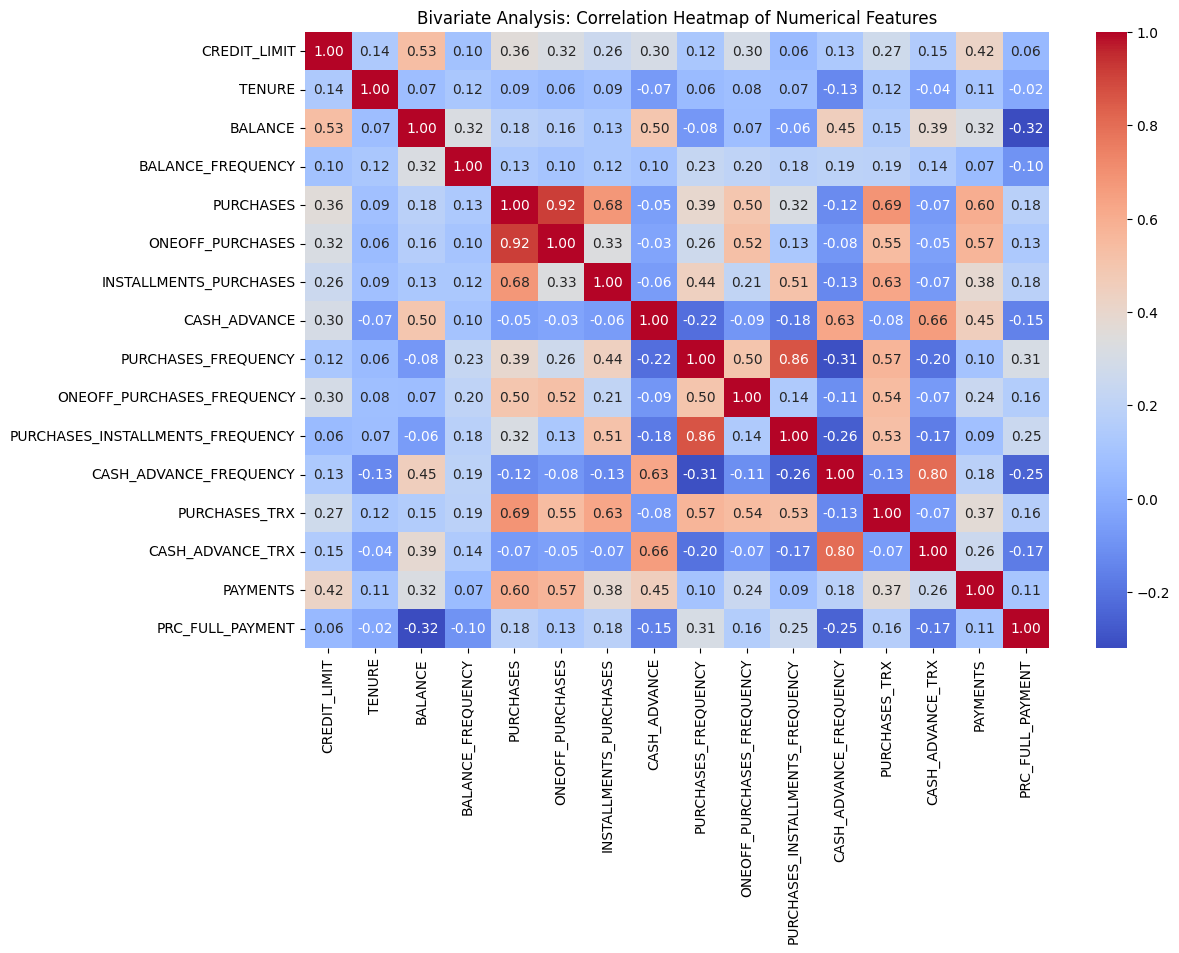

In [23]:
# 1. Correlation Heatmap for Numeric Features
import seaborn as sns

plt.figure(figsize=(12, 8))
correlation_matrix = df[numeric_columns].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Bivariate Analysis: Correlation Heatmap of Numerical Features')
plt.show()

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


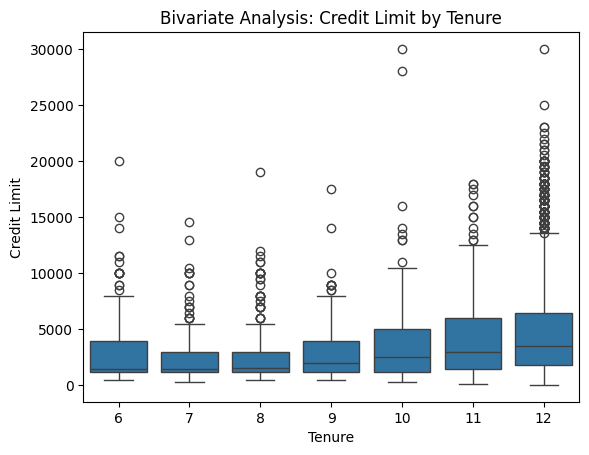

In [27]:
# 2. Box plot of credit limits by tenure
sns.boxplot(x='TENURE', y='CREDIT_LIMIT', data=df)
plt.title('Bivariate Analysis: Credit Limit by Tenure')
plt.xlabel('Tenure')
plt.ylabel('Credit Limit')
plt.show()

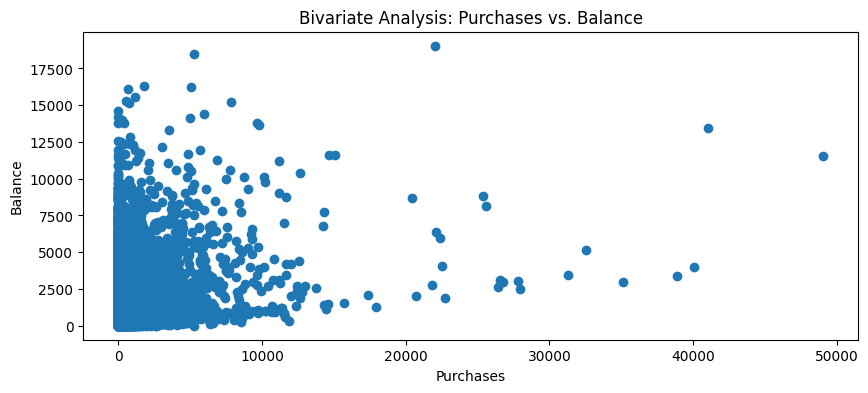

In [26]:
# 3. Scatter plot of purchases vs. balance
plt.figure(figsize=(10, 4))
plt.scatter(df['PURCHASES'], df['BALANCE'])
plt.title('Bivariate Analysis: Purchases vs. Balance')
plt.xlabel('Purchases')
plt.ylabel('Balance')
plt.show()

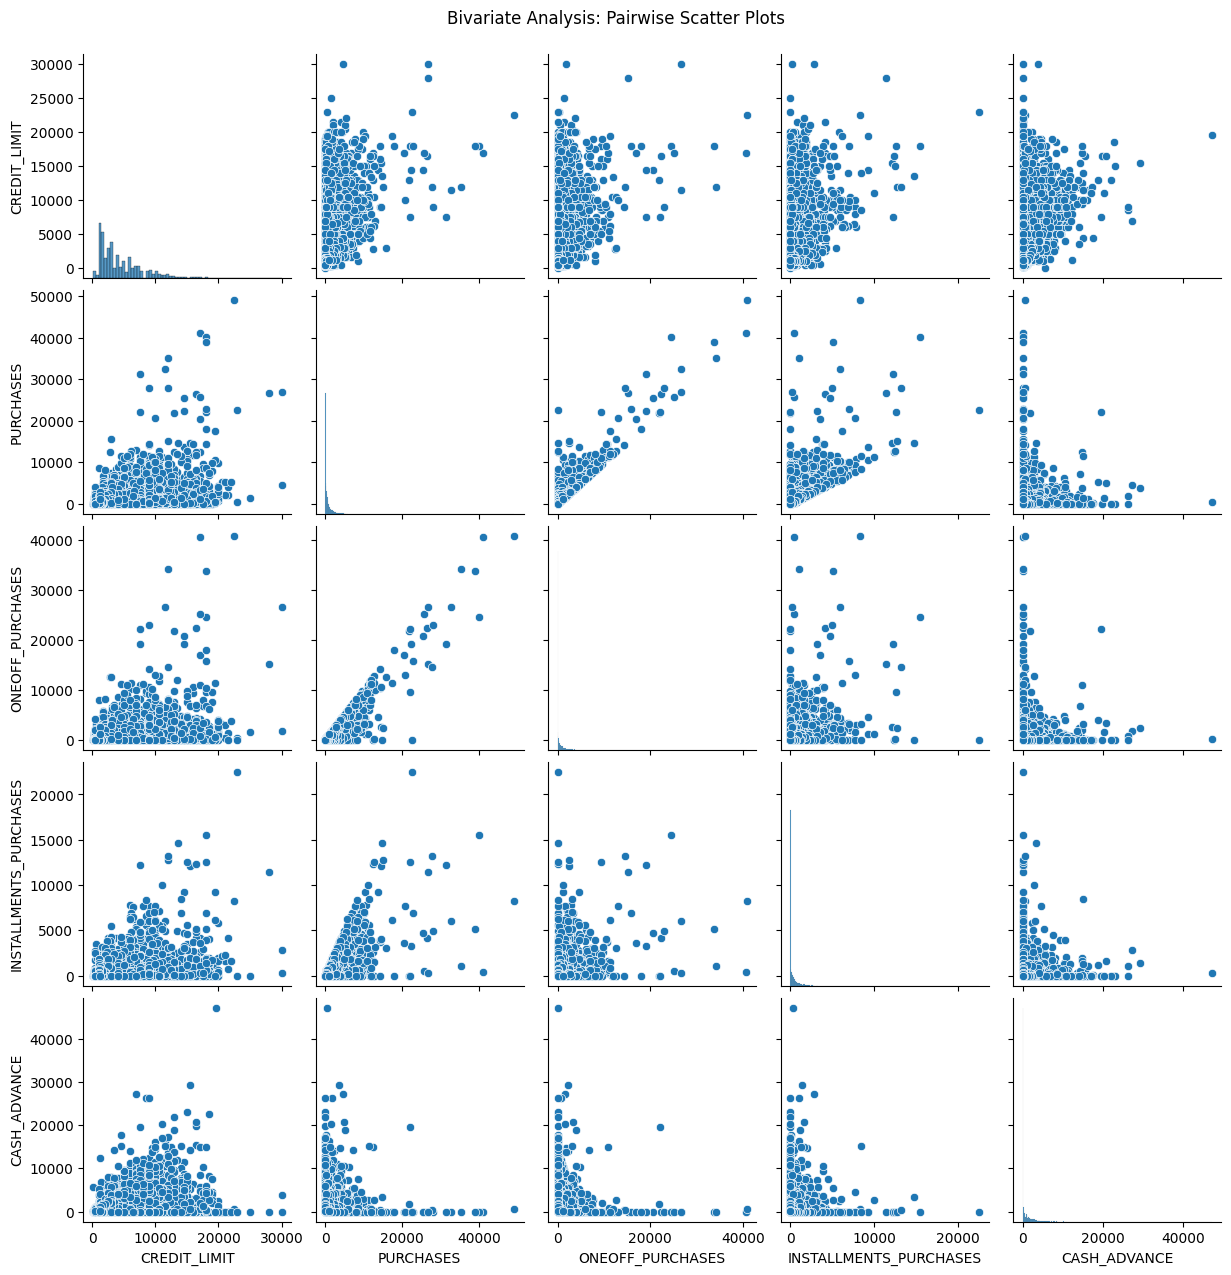

In [25]:
# 4. Pairwise Scatter Plots for Purchase Behavior and Credit Limit
sns.pairplot(df[['CREDIT_LIMIT', 'PURCHASES', 'ONEOFF_PURCHASES', 'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE']])
plt.suptitle('Bivariate Analysis: Pairwise Scatter Plots', y=1.02)
plt.show()

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


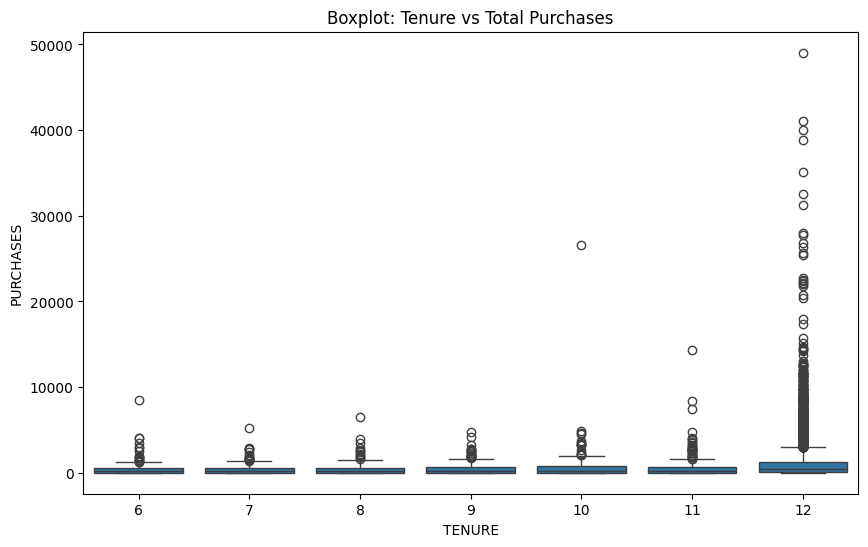

In [28]:
# 5. Boxplot for Credit Limit vs Purchase Categories
plt.figure(figsize=(10, 6))
sns.boxplot(x='TENURE', y='PURCHASES', data=df)
plt.title('Boxplot: Tenure vs Total Purchases')
plt.show()

**(c) Multivariate Analysis**



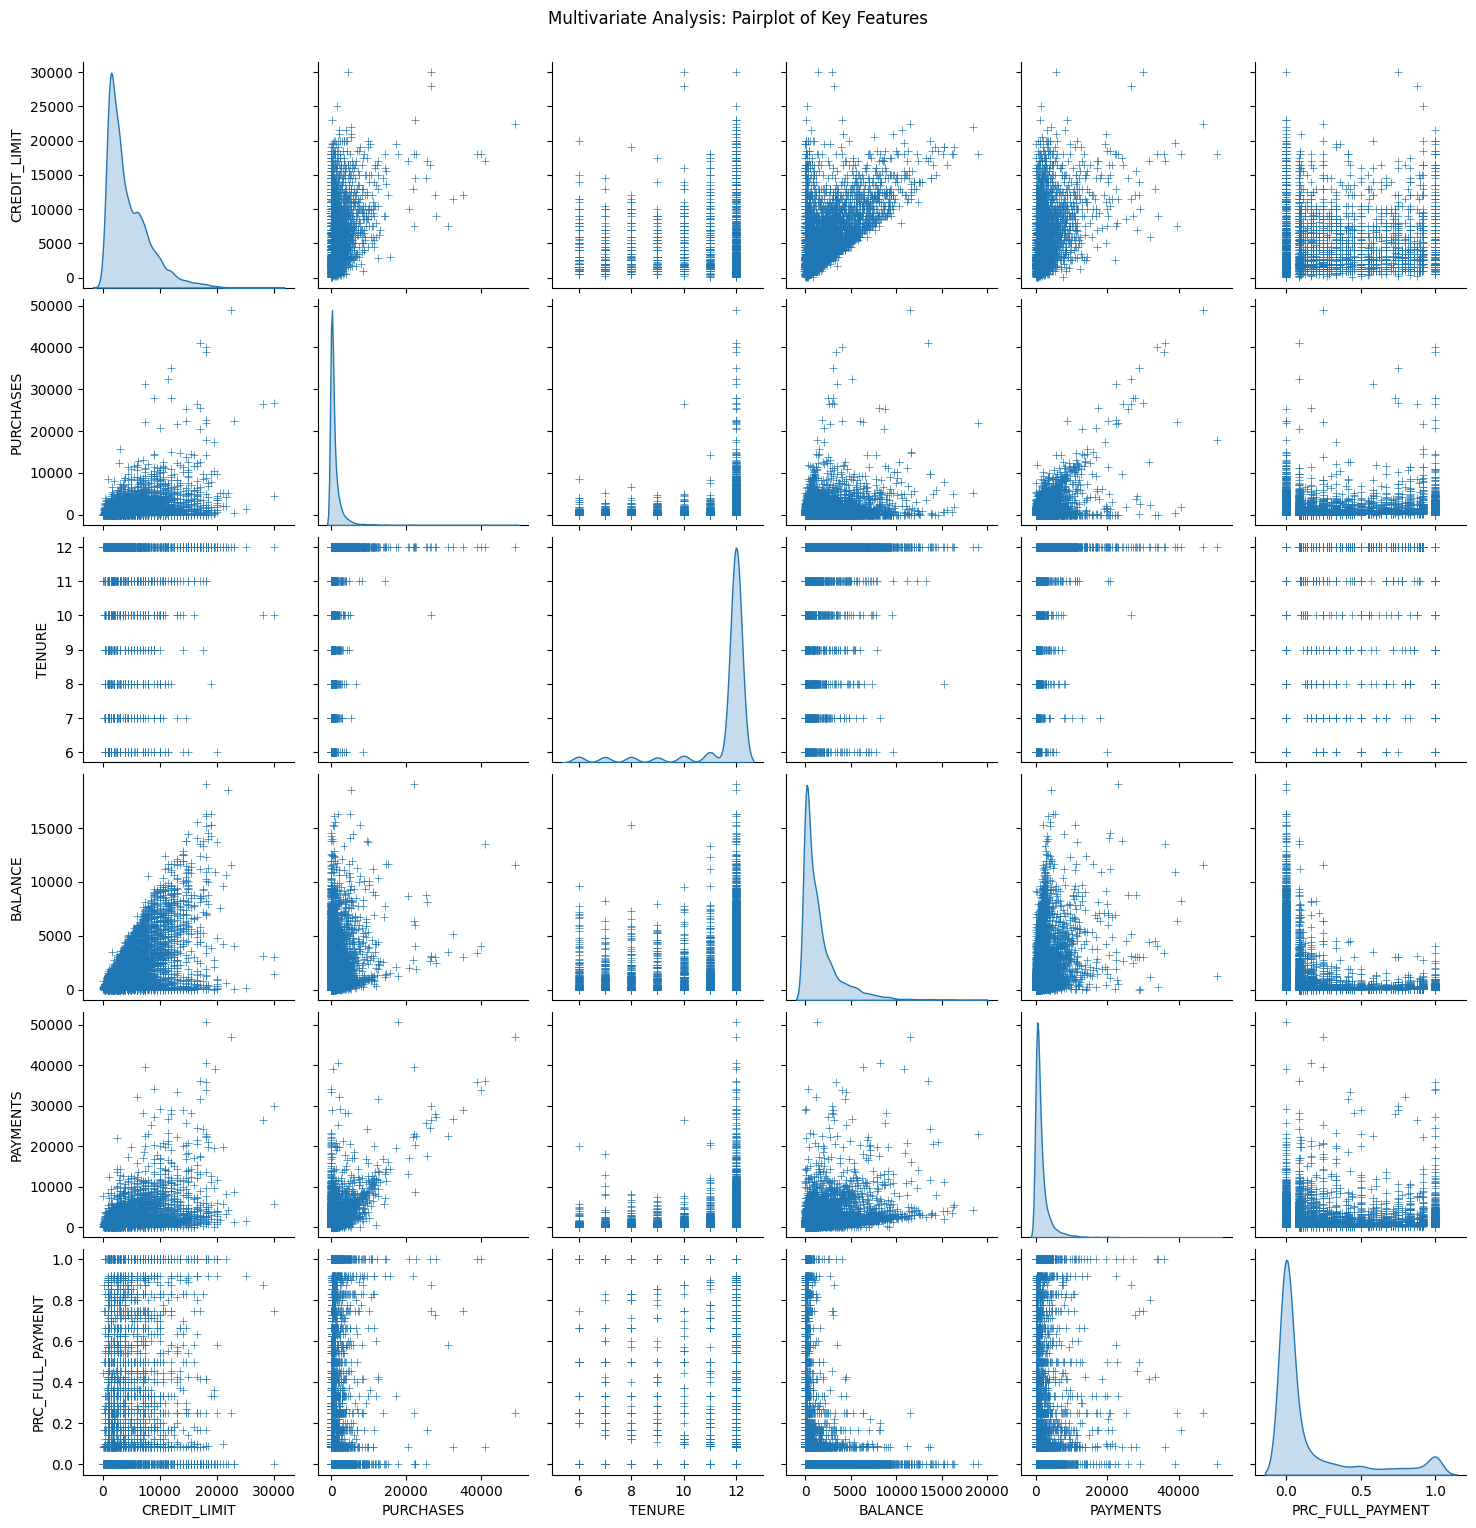

In [29]:
# 1. Pairplot for Key Variables Related to Customer Segmentation
key_columns = ['CREDIT_LIMIT', 'PURCHASES', 'TENURE', 'BALANCE', 'PAYMENTS', 'PRC_FULL_PAYMENT']
sns.pairplot(df[key_columns], diag_kind='kde', markers='+')
plt.suptitle('Multivariate Analysis: Pairplot of Key Features', y=1.02)
plt.show()

In [ ]:
import scipy.stats as stats

# Calculate Z-scores
z_scores = stats.zscore(df['PURCHASES'])

# Identify outliers
outliers_z_score = df[(z_scores > 3) | (z_scores < -3)]
print("Outliers based on Z-score:")
print(outliers_z_score)

Outliers based on Z-score:
     CUST_ID       BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
125   C10131   2392.917738           1.000000   12462.44          12462.44   
138   C10144  19043.138560           1.000000   22009.92           9449.07   
153   C10159  13673.079610           1.000000    9792.23           3959.81   
171   C10177    975.942008           1.000000   10221.35           7141.38   
204   C10212   4559.779234           1.000000   10848.50           8208.00   
...      ...           ...                ...        ...               ...   
7277  C17473    561.003319           1.000000   11577.00          10975.00   
7378  C17579   4228.417754           1.000000   11994.71          11994.71   
7553  C17757   2017.391656           1.000000   12024.37          11224.10   
8541  C18773   3326.323283           1.000000    8209.77           2218.28   
8689  C18926    368.318662           0.909091    8053.95           8053.95   

      INSTALLMENTS_PURCHASES  CASH_A

                             Feature   Skewness
0                       CREDIT_LIMIT   1.522209
1                             TENURE  -2.942524
2                            BALANCE   2.392985
3                  BALANCE_FREQUENCY  -2.022926
4                          PURCHASES   8.142904
5                   ONEOFF_PURCHASES  10.043399
6             INSTALLMENTS_PURCHASES   7.297897
7                       CASH_ADVANCE   5.165743
8                PURCHASES_FREQUENCY   0.060154
9         ONEOFF_PURCHASES_FREQUENCY   1.535355
10  PURCHASES_INSTALLMENTS_FREQUENCY   0.509116
11            CASH_ADVANCE_FREQUENCY   1.828380
12                     PURCHASES_TRX   4.629879
13                  CASH_ADVANCE_TRX   5.720339
14                          PAYMENTS   5.906630
15                  PRC_FULL_PAYMENT   1.942494


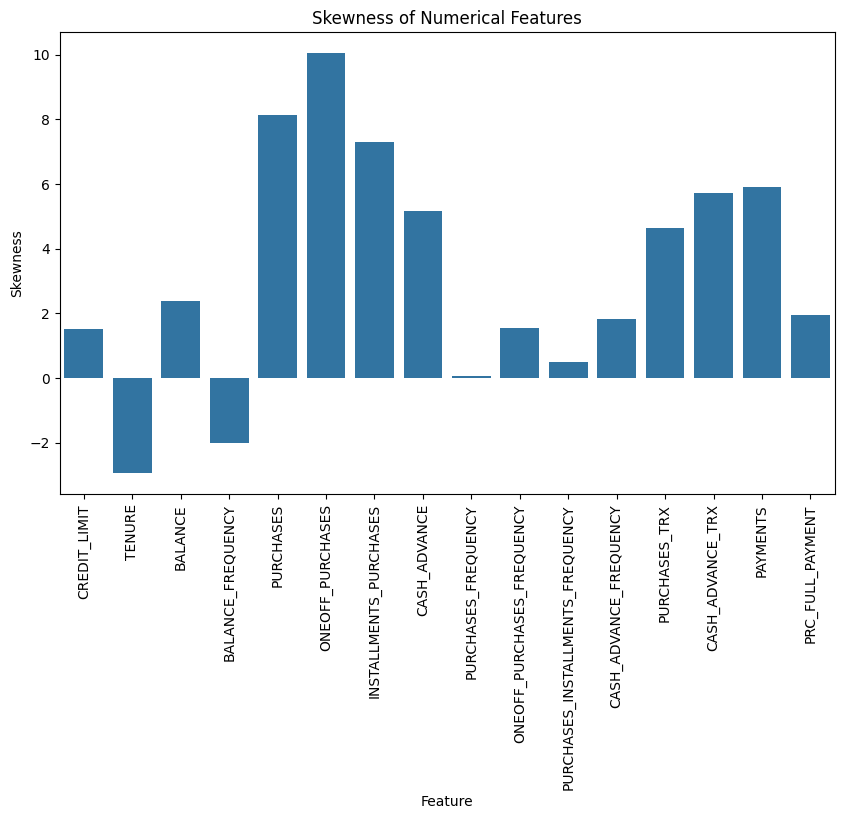

In [32]:
#Check for skewness
from scipy.stats import skew

# List of numeric columns in the dataset
numeric_columns = ['CREDIT_LIMIT', 'TENURE', 'BALANCE', 'BALANCE_FREQUENCY',
                   'PURCHASES', 'ONEOFF_PURCHASES', 'INSTALLMENTS_PURCHASES',
                   'CASH_ADVANCE', 'PURCHASES_FREQUENCY', 'ONEOFF_PURCHASES_FREQUENCY',
                   'PURCHASES_INSTALLMENTS_FREQUENCY', 'CASH_ADVANCE_FREQUENCY',
                   'PURCHASES_TRX', 'CASH_ADVANCE_TRX', 'PAYMENTS', 'PRC_FULL_PAYMENT']

# Compute skewness for each numeric feature
skewness_values = df[numeric_columns].apply(lambda x: skew(x.dropna()))

# Create a DataFrame to display skewness
skewness_df = pd.DataFrame({'Feature': skewness_values.index, 'Skewness': skewness_values.values})

# Print the skewness values
print(skewness_df)

# Plot skewness values
plt.figure(figsize=(10, 6))
sns.barplot(x='Feature', y='Skewness', data=skewness_df)
plt.xticks(rotation=90)
plt.title('Skewness of Numerical Features')
plt.show()

# **Handling Outliers**

Using the IQR method will cap the outliers at the upper and lower bounds. This is to handle the common skewness.

In [33]:
#Using IQR to handle outliers
import numpy as np

# List of columns to check for outliers
numeric_columns = ['CREDIT_LIMIT', 'TENURE', 'BALANCE', 'BALANCE_FREQUENCY',
                   'PURCHASES', 'ONEOFF_PURCHASES', 'INSTALLMENTS_PURCHASES',
                   'CASH_ADVANCE', 'PURCHASES_FREQUENCY', 'ONEOFF_PURCHASES_FREQUENCY',
                   'PURCHASES_INSTALLMENTS_FREQUENCY', 'CASH_ADVANCE_FREQUENCY',
                   'PURCHASES_TRX', 'CASH_ADVANCE_TRX', 'PAYMENTS', 'PRC_FULL_PAYMENT']

# Function to handle outliers using the IQR method
def handle_outliers_iqr(df, columns):
    for column in columns:
        # Calculate Q1 (25th percentile) and Q3 (75th percentile)
        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.75)
        IQR = Q3 - Q1  # Interquartile range

        # Define the bounds for outliers
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        # Capping the outliers
        df[column] = np.where(df[column] < lower_bound, lower_bound, df[column])
        df[column] = np.where(df[column] > upper_bound, upper_bound, df[column])

    return df

# Apply the outlier handling function to your dataset
df_cleaned = handle_outliers_iqr(df, numeric_columns)

# Check if the outliers have been capped by describing the dataset again
print(df_cleaned.describe())

           BALANCE  BALANCE_FREQUENCY    PURCHASES  ONEOFF_PURCHASES  \
count  8950.000000        8950.000000  8950.000000       8950.000000   
mean   1390.508973           0.931587   737.149330        354.358139   
std    1537.538479           0.110984   879.534788        511.823289   
min       0.000000           0.722223     0.000000          0.000000   
25%     128.281915           0.888889    39.635000          0.000000   
50%     873.385231           1.000000   361.280000         38.000000   
75%    2054.140036           1.000000  1110.130000        577.405000   
max    4942.927215           1.000000  2715.872500       1443.512500   

       INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
count             8950.000000   8950.000000          8950.000000   
mean               295.546214    672.468924             0.490351   
std                396.181546    998.514970             0.401371   
min                  0.000000      0.000000             0.000000   
25%        